# Importando bibliotecas e importando os dados

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [ ]:
dados_treino = pd.read_csv('train.csv')

dados_teste = pd.read_csv('test.csv')

In [ ]:
dados_treino.shape

(891, 12)

In [ ]:
dados_teste.shape

(418, 11)

# Análise exploratoria

In [ ]:
dados_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
t = dados_treino['Fare'].value_counts()

In [ ]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dados_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checando quanto valores nulos há em cada coluna

In [ ]:
for coluna in dados_treino.columns:
  print(f'{dados_treino[coluna].isnull().value_counts().name}: {dados_treino[coluna].isnull().value_counts()[0]}')

PassengerId: 891
Survived: 891
Pclass: 891
Name: 891
Sex: 891
Age: 714
SibSp: 891
Parch: 891
Ticket: 891
Fare: 891
Cabin: 204
Embarked: 889


In [ ]:
dados_treino.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

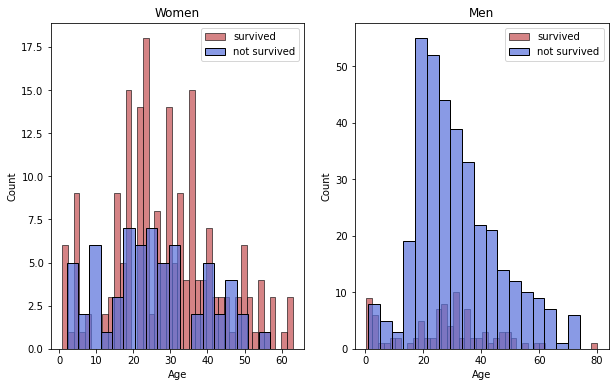

In [ ]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (10, 6))

women = dados_treino.loc[dados_treino['Sex'] == 'female']
men = dados_treino.loc[dados_treino['Sex'] == 'male']

ax = sns.histplot(women[women['Survived'] == 1].Age.dropna(), bins= 40, label = survived, ax = axes[0], kde= False, color= '#c44e52', alpha= 0.7)
ax = sns.histplot(women[women['Survived'] == 0].Age.dropna(), bins= 18, label = not_survived, ax= axes[0], kde= False, color= '#5770db', alpha= 0.7)
ax.set_title('Women')
ax.legend()

ax = sns.histplot(men[men['Survived'] == 1].Age.dropna(), bins= 40, label= survived, ax= axes[1], kde= False, color= '#c44e52', alpha= 0.7)
ax = sns.histplot(men[men['Survived'] == 0].Age.dropna(), bins= 18, label= not_survived, ax= axes[1], kde= False, color= '#5770db', alpha= 0.7)
ax.set_title('Men')
ax.legend()

Aparentemente os homens tem uma probabilidade maior de morte dos 20 aos 38 anos, e uma taxa de sobrevivencia maior dos 18 aos 30 anos, variando mais em relação às mulheres.

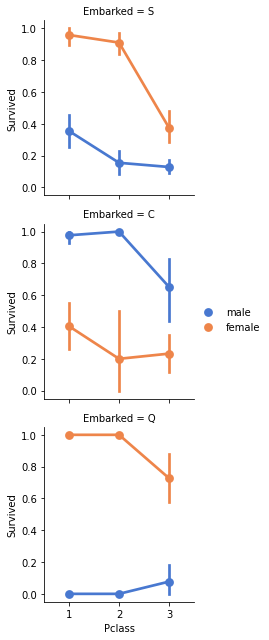

In [ ]:
Facetgrid = sns.FacetGrid(dados_treino, row= 'Embarked')

Facetgrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette= 'muted', order= None, hue_order= None)

Facetgrid.add_legend()

As mulheres tem uma chance maior de sobrevivencia que os homens entrando pelas portas Q e S

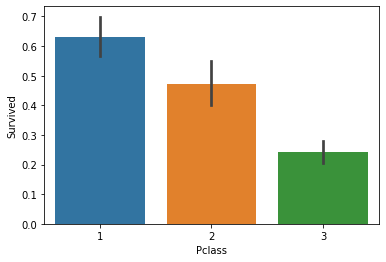

In [ ]:
sns.barplot(data= dados_treino, x= 'Pclass', y= 'Survived')

As pessoas tiveram uma chance de sobrevivencia relativamente maior na 1° classe

<Figure size 432x288 with 0 Axes>

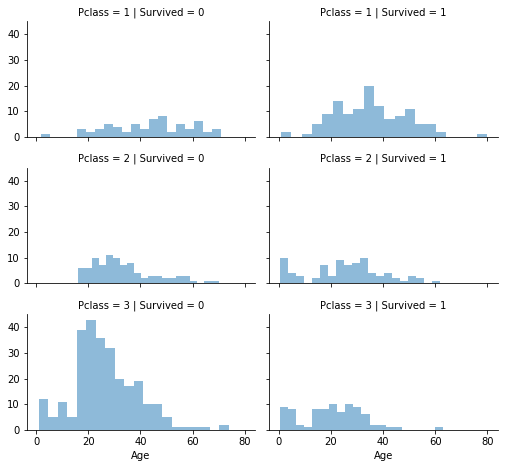

In [ ]:
plt.figure()

grid = sns.FacetGrid(dados_treino, col= 'Survived', row= 'Pclass', height= 2.2, aspect= 1.6)

grid.map(plt.hist, 'Age', alpha= 0.5, bins= 20)

grid.add_legend()

Nesse grafico fica mais claro que as pessoas tiveram uma chance maior de sobrevivencia na 1° classe, em contrapartida há uma chance maior de morte na 3° classe

In [ ]:
dados_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dados = [dados_treino, dados_teste]

for dataset in dados:

  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1 

  dataset['not_alone'] = dataset['not_alone'].astype(int)

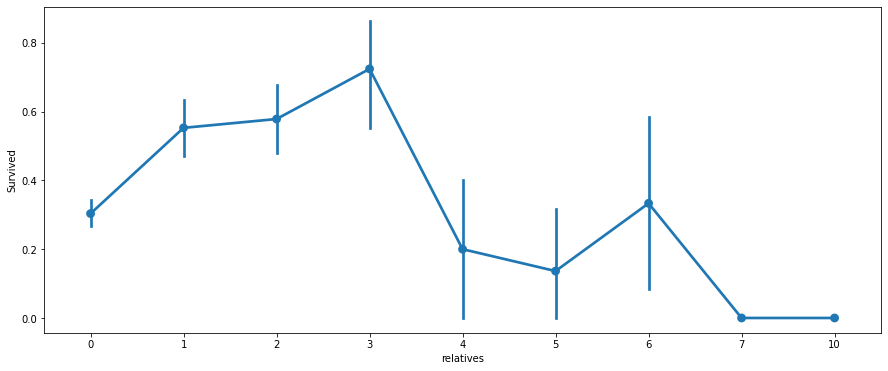

In [ ]:
plt.figure(figsize= (15, 6))

axes = sns.pointplot(data= dados_treino, x= 'relatives', y= 'Survived', aspect= 2.5)

# Pré-Processamento de dados

In [ ]:
dados_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


Deletando a coluna PassengerId que não tem nenhum motivo de uso nesse caso

In [ ]:
dados = [dados_treino, dados_teste]

for dataset in dados:
  dataset.drop(columns= 'PassengerId', inplace= True)

Agrupando as cabines em decks

In [ ]:
import re

deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U': 8}

dados = [dados_treino, dados_teste]

for dataset in dados:
  dataset['Cabin'] = dataset['Cabin'].fillna('U0')
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)

  dataset['Deck'] = dataset['Deck'].astype(int)

Deletando a coluna 'Cabin' dos dois Df

In [ ]:
dados_treino.drop(columns= 'Cabin', axis= 1, inplace= True)
dados_teste.drop(columns= 'Cabin', axis= 1, inplace= True)

Substituindo os valores nulos da coluna 'Age' pelo desvio padrão da idade

In [ ]:
dados = [dados_treino, dados_teste]

for dataset in dados:

  idade_media = dataset['Age'].mean()
  idade_std = dataset['Age'].std()
  idade_nulos = dataset['Age'].isnull().sum()

  nova_idade = np.random.randint(idade_media - idade_std, idade_media + idade_std, size= idade_nulos)

  idade_corte = dataset['Age'].copy()
  idade_corte[np.isnan(idade_corte)] = nova_idade

  dataset['Age'] = idade_corte
  dataset['Age'] = dataset['Age'].astype(int)

In [ ]:
dados_treino['Embarked'].isnull().sum()

2

Substituindo os valores nulos de 'Embarked' pela moda

In [ ]:
dados = [dados_treino, dados_teste]

for dataset in dados:
  dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace= True)

Transformando a coluna 'Fare' em inteiros

In [ ]:
dados = [dados_treino, dados_teste]

for dataset in dados:
  
  dataset.fillna(0, inplace= True)
  dataset['Fare'] = dataset['Fare'].astype(int)

Extraindo os titulos e substituindo os que aparecem menos por Rare

In [ ]:
dados = [dados_treino, dados_teste]

for dataset in dados:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand= False)

  dataset['Title'].replace(['Col', 'Major', 'Capt', 'Countess', 'Jonkheer', 'Don', 'Sir', 'Lady'], 'Rare', inplace= True)
  dataset['Title'].replace('Mlle', 'Miss', inplace= True)
  dataset['Title'].replace('Mme', 'Miss', inplace= True)
  dataset['Title'].replace('Ms', 'Mrs', inplace= True)

Text(0.5, 0, 'Titulo')

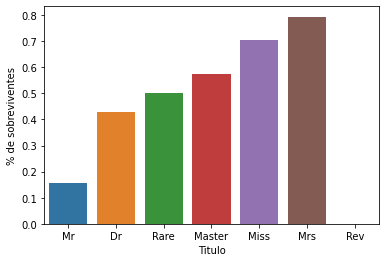

In [ ]:
sobreviventes = dados_treino.loc[dados_treino['Survived'] == 1]

tripulantes_agrupado = dados_treino.groupby(dados_treino['Title']).count()
sobreviventes_agrupado = sobreviventes.groupby(sobreviventes['Title']).sum()

pct_sobreviventes = sobreviventes_agrupado['Survived'] / tripulantes_agrupado['Survived']
pct_sobreviventes.sort_values(ascending= True, inplace= True)

sns.barplot(x = pct_sobreviventes.index, y= pct_sobreviventes.values)
plt.ylabel('% de sobreviventes')
plt.xlabel('Titulo')

Mapeando os titulos com inteiros

In [ ]:
dados = [dados_treino, dados_teste]

titulos = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5,'Dr': 6, 'Rev': 7}

for dataset in dados:
  dataset['Title'] = dataset['Title'].map(titulos)

  dataset['Title'].fillna(0, inplace= True)

  dataset.drop(columns= 'Name', inplace= True)

In [ ]:
dados_treino['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Mapeando o Sexo com inteiros

In [ ]:
dados = [dados_treino, dados_teste]

generos = {'male': 0, 'female': 1}

for dataset in dados:
  dataset['Sex'] = dataset['Sex'].map(generos)

Excluindo a coluna Ticket

In [ ]:
dados_treino.drop(columns= 'Ticket', inplace= True)
dados_teste.drop(columns= 'Ticket', inplace= True)

Mapeando as portas de entradas com inteiros

In [ ]:
portas = {'S': 0, 'C': 1, 'Q': 2}

dados = [dados_treino, dados_teste]

for dataset in dados:
  dataset['Embarked'] = dataset['Embarked'].map(portas)

In [ ]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int64
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int64
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int64
 10  Deck       891 non-null    int64
 11  Title      891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


Criando categorias para as idade e substituindo a coluna Age por inteiros

In [ ]:
dados = [dados_treino, dados_teste]

bins = [-1, 11, 18, 22, 27, 33, 40, 66, 100]

for dataset in dados:

  cuts = pd.cut(dataset['Age'].values, bins)

  dataset['Age'] = cuts.codes

In [ ]:
dados_treino['Age'].value_counts()

6    158
4    155
5    148
3    141
2    122
1     92
0     68
7      7
Name: Age, dtype: int64

Fazendo o mesmo que foi feito com a coluna "Age" para a coluna "Fare"

In [ ]:
dados = [dados_treino, dados_teste]

bins = [-1, 7.91, 14.454, 31, 99, 250, 550]

for dataset in dados:

  cuts = pd.cut(dataset['Fare'].values, bins)

  dataset['Fare'] = cuts.codes

In [ ]:
dados_treino['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [ ]:
dados_treino.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
5,0,3,0,3,0,0,1,2,0,1,8,1
6,0,1,0,6,0,0,3,0,0,1,5,1
7,0,3,0,0,3,1,2,0,4,0,8,4
8,1,3,1,3,0,2,1,0,2,0,8,3
9,1,2,1,1,1,0,2,1,1,0,8,3


# Realizando a classificação usando Random Forest

Dividindo a base entre variaveis de interesse e variaveis preditoras, e base de teste

In [ ]:
X_treino = dados_treino.drop(columns= 'Survived', axis= 1)
y_treino = dados_treino['Survived']
X_teste = dados_teste.copy()

In [ ]:
submission = pd.read_csv('gender_submission.csv')

Aplicando o modelo

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Realizando a previsão

In [ ]:
previsao = rfc.predict(X_teste)

Obtendo o score do modelo

In [ ]:
accuracy_score(previsao, submission['Survived'])

0.8397129186602871

In [ ]:
confusion_matrix(previsao, submission['Survived'])

array([[229,  30],
       [ 37, 122]])

In [ ]:
submission['Survived'] = previsao

In [ ]:
submission.to_csv('submissao.csv', index= False)

In [ ]:
submission['Survived'].value_counts()

0    259
1    159
Name: Survived, dtype: int64